In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from category_encoders import MEstimateEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('insurance.csv')
df_insurance = df.copy()

df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data Observation, Cleaning

In [3]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_insurance.duplicated().sum()

np.int64(1)

In [5]:
df_insurance.drop_duplicates(inplace = True)

In [6]:
df_insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### EDA

In [8]:
fig = px.histogram(df_insurance,
                   x = 'charges',
                   marginal = 'box',
                   title ='Medical Insurance Charges')
fig.update_traces(marker = dict(color = 'lightgreen'))
fig.update_layout(bargap = 0.1, width = 1000, height = 600)
fig.show()

In [9]:
df_counts = df_insurance['sex'].value_counts().reset_index()
df_counts.columns = ['sex', 'count']

fig = px.bar(df_counts,
             x = 'sex',
             y = 'count',
             title = 'Gender Count')
fig.update_traces(marker = dict(color = 'lightblue'))
fig.update_layout(width =1000, height= 600)
fig.show()

In [10]:
df_counts = df_insurance['children'].value_counts().reset_index()
df_counts.columns = ['children', 'count']

fig = px.bar(df_counts,
             x = 'children',
             y = 'count',
             title = 'Children Count')
fig.update_traces(marker = dict(color = 'lightgreen'))
fig.update_layout(width =1000, height= 600)
fig.show()

In [11]:
df_counts = df_insurance['smoker'].value_counts().reset_index()
df_counts.columns = ['smoker', 'count']

fig = px.bar(df_counts,
         x = 'smoker',
         y= 'count',
         title = 'Smoker Counts')
fig.update_traces(marker = dict(color = 'lightblue'))
fig.update_layout(width = 1000, height = 600)
fig.show()

In [12]:
df_counts = df_insurance['region'].value_counts().reset_index()
df_counts.columns = ['region', 'count']

fig = px.bar(df_counts,
             x = 'region',
             y = 'count',
             title = 'Region Distribution')
fig.update_traces(marker = dict(color= 'lightgreen'))
fig.update_layout(width = 1000, height = 600)
fig.show()

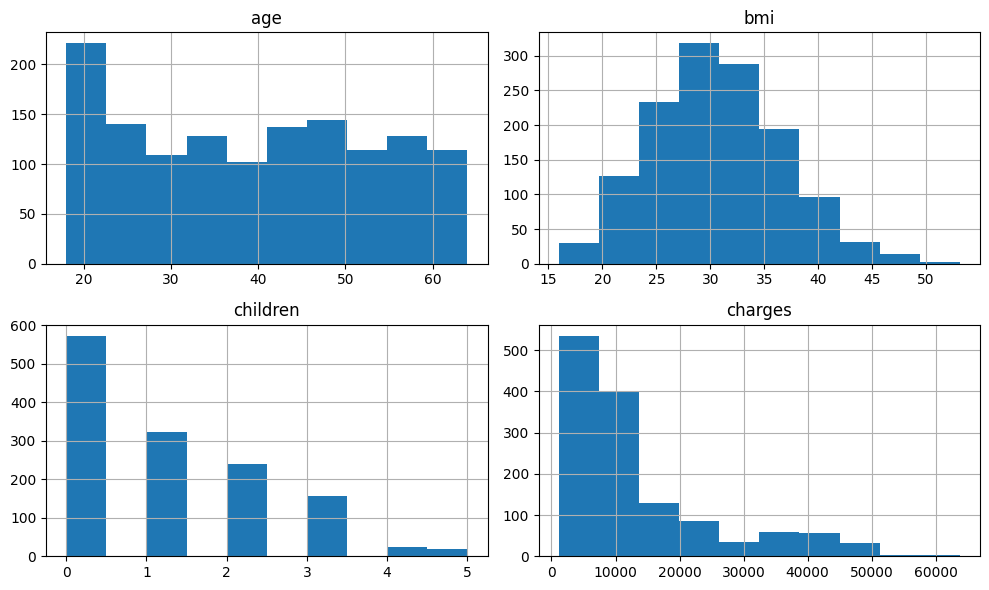

In [13]:
df_insurance.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

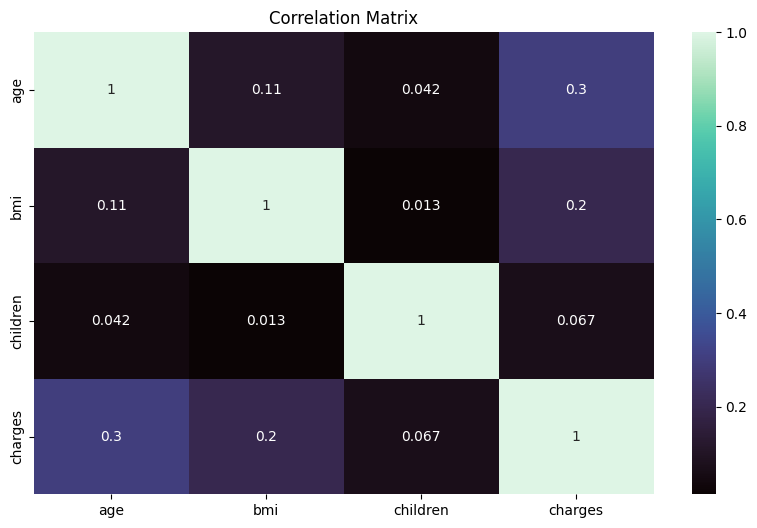

In [14]:
num_cols = df_insurance.select_dtypes(['float','int'])
df_corr = num_cols.corr()

plt.figure(figsize=(10,6))
plt.title('Correlation Matrix')
sns.heatmap(df_corr, annot =True, cmap = 'mako')

#### Data Preprocessing

In [15]:
df_train = df_insurance.copy()

In [16]:
x = df_train.drop(['charges'], axis= 1)
y = df_train['charges']

In [17]:
object_cols = df_train.select_dtypes(include = ['object']).columns.tolist()

MEncoder = MEstimateEncoder(cols = object_cols, m = 0.5)
x = MEncoder.fit_transform(x, y)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [19]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Data Modelling, Prediction

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr_pred = lr.predict(x_test)
lr_plot = pd.DataFrame({'Actual Values': y_test , 'Predicted Values': lr_pred})

lr_plot.head()

,Actual Values,Predicted Values
900,8688.85885,7068.117271
1064,5708.86700,5600.005057
1256,11436.73815,13508.782641
298,38746.35510,31162.209239
237,4463.20510,8545.387328


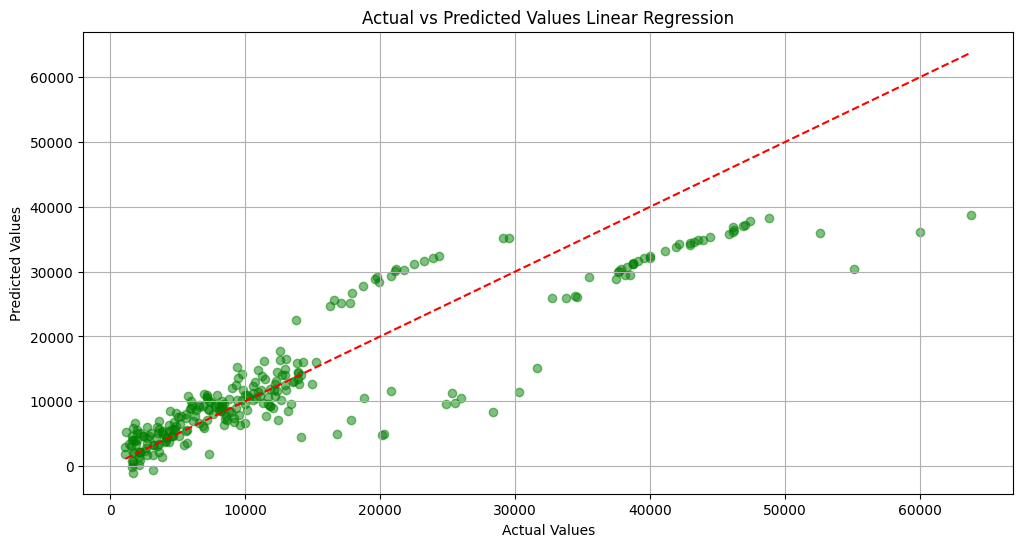

In [22]:
plt.figure(figsize = (12, 6))
plt.scatter(y_test, lr_pred, color = 'green', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color ='red', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values Linear Regression')
plt.grid()
plt.show()

In [23]:
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

print(lr_r2)
print(lr_mse)

0.7981624394405261
37088875.70406596


#### Random Forest Model

In [24]:
pipeline_rf = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', RandomForestRegressor(random_state=42))
])

In [25]:
param_grid_rf = {
    'model__n_estimators': [100, 200, 300, 400],  #
    'model__max_features': ['sqrt', 'log2', None],     
    'model__max_depth': [None, 10, 20, 30],       
    'model__min_samples_split': [2, 5, 10],       
    'model__min_samples_leaf': [1, 2, 4],         
    'model__bootstrap': [True, False]             
}

In [26]:
grid_search_rf = GridSearchCV(estimator=pipeline_rf, 
                              param_grid=param_grid_rf, 
                              cv=KFold(n_splits=2, shuffle=True), 
                              scoring='neg_mean_squared_error', 
                              n_jobs=-1)

In [27]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [28]:
best_params_rf = grid_search_rf.best_params_
print(f'Best parameters for Random Forest: {best_params_rf}')

Best parameters for Random Forest: {'model__bootstrap': True, 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 400}


In [29]:
rf_best = grid_search_rf.best_estimator_

In [30]:
rf_pred_best = rf_best.predict(x_test)
rf_plot = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': rf_pred_best})

rf_plot.head()

,Actual Values,Predicted Values
900,8688.85885,10191.783424
1064,5708.86700,7517.256953
1256,11436.73815,10961.422501
298,38746.35510,38671.506717
237,4463.20510,5623.581378


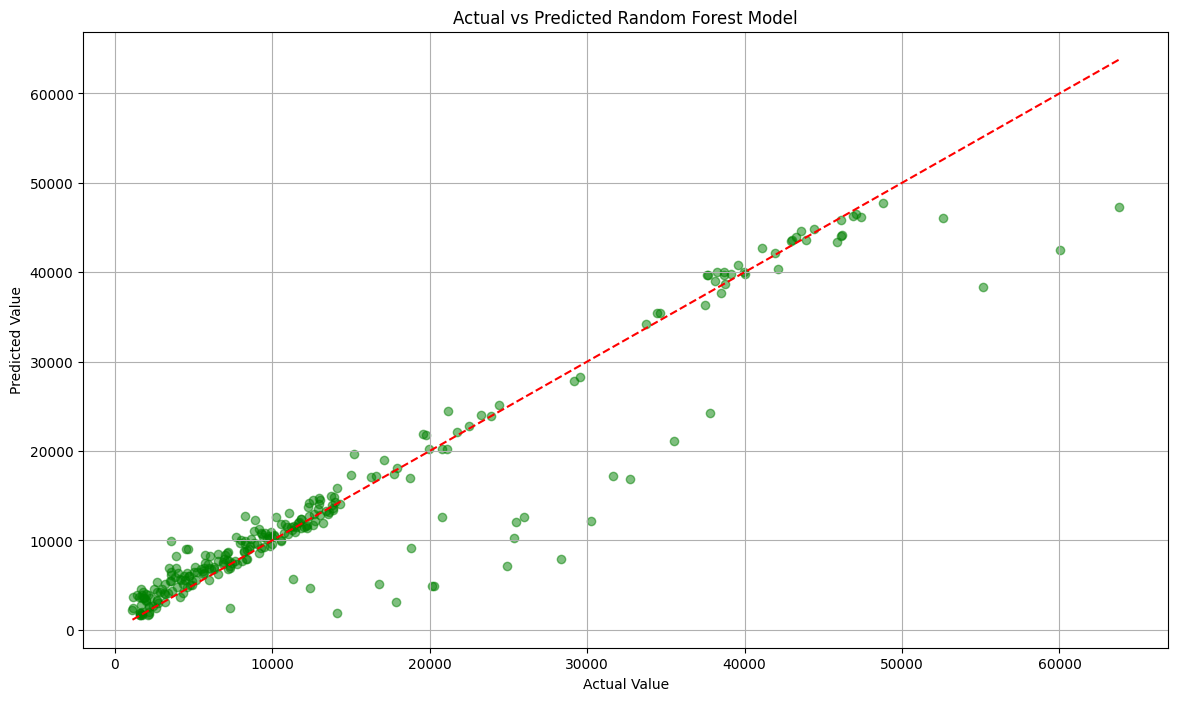

In [31]:
plt.figure(figsize=(14,8))
plt.scatter(y_test, rf_pred_best, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Random Forest Model')
plt.grid(True)
plt.show()

In [32]:
rf_r2 = r2_score(y_test, rf_pred_best)
rf_mse = mean_squared_error(y_test, rf_pred_best)
rf_mae = mean_absolute_error(y_test, rf_pred_best)

#### XGBoost

In [33]:
pipeline_xgb = Pipeline([
    ('scaler', RobustScaler()),
    ('model', XGBRegressor(objective='reg:squarederror'))
])

In [34]:
param_grid_xgb = {
    'model__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'model__max_depth': [3, 5, 7, 10],
    'model__n_estimators': [50, 100, 200, 300],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

In [35]:
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, 
                               param_grid=param_grid_xgb, 
                               cv=KFold(n_splits=2, shuffle=True), 
                               scoring='neg_mean_squared_error')


In [36]:
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'model__colsample_bytree': [0.6, 0.8, 1.0],
                         'model__learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'model__max_depth': [3, 5, 7, 10],
                         'model__n_estimators': [50, 100, 200, 300],
                         'model__subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [37]:
best_params_xgb = grid_search_xgb.best_params_
print(f'Best parameters for XGBoost: {best_params_xgb}')

Best parameters for XGBoost: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.6}


In [38]:
xg_best = grid_search_xgb.best_estimator_

In [39]:
xg_pred_best = xg_best.predict(x_test)
xg_plot = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': xg_pred_best})

xg_plot.head()

,Actual Values,Predicted Values
900,8688.85885,10129.338867
1064,5708.86700,8528.008789
1256,11436.73815,12281.294922
298,38746.35510,38269.480469
237,4463.20510,6679.459961


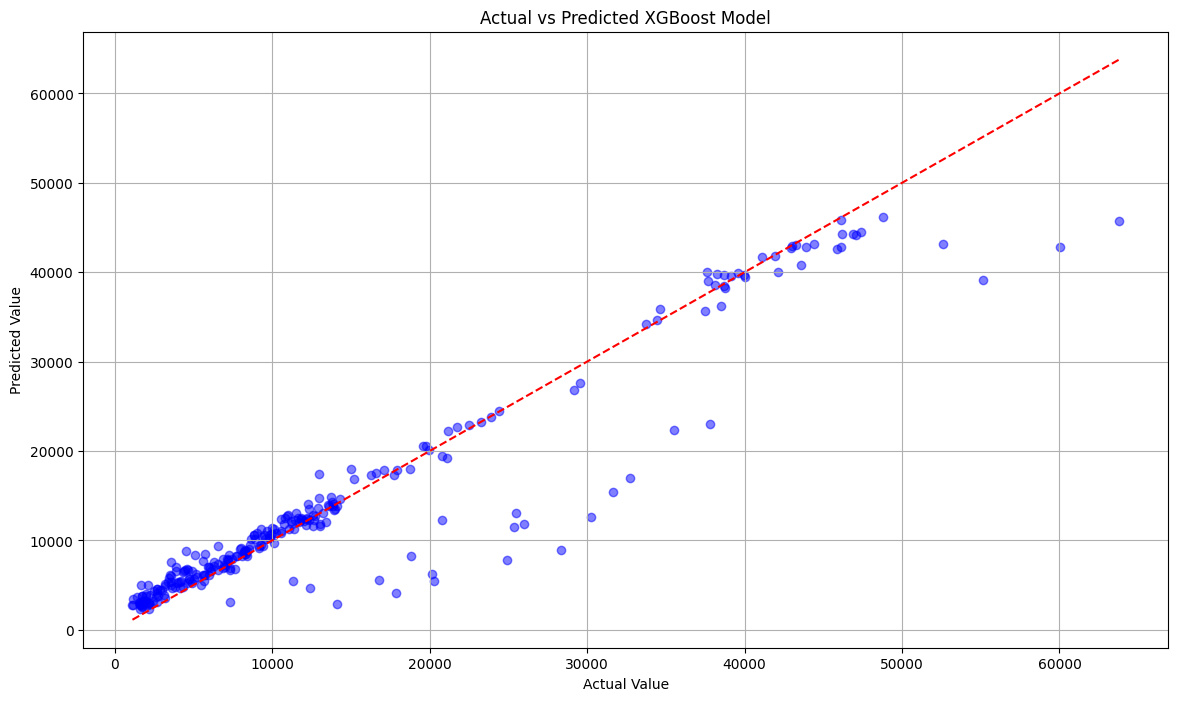

In [40]:
plt.figure(figsize=(14,8))
plt.scatter(y_test, xg_pred_best, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted XGBoost Model')
plt.grid(True)
plt.show()

In [41]:
xg_r2 = r2_score(y_test, xg_pred_best)
xg_mse = mean_squared_error(y_test, xg_pred_best)
xg_mae = mean_absolute_error(y_test, xg_pred_best)

In [42]:
# Feature Importance

feature_names = x.columns.tolist()
importances = xg_best.named_steps['model'].feature_importances_

df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

fig = px.bar(df_importances, 
             x='Importance', 
             y='Feature', 
             orientation='h',
             title='Feature Importance from XGBoost Model')
fig.update_traces(marker=dict(color='lightblue'))
fig.update_layout(width=1200, height=800, yaxis={'categoryorder':'total ascending'})
fig.show()

### Model Evaluation

In [43]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
data = [[lr_r2, lr_mse, lr_mae],[rf_r2, rf_mse, rf_mae],[xg_r2,xg_mse, xg_mae]]
cols = ['R2', 'MSE', 'MAE']
pd.DataFrame(data, columns = cols, index = models).sort_values(ascending=False, by = 'R2')

,R2,MSE,MAE
XGBoost,0.897709,1.879661e+07,2189.421724
Random Forest,0.894887,1.931508e+07,2202.385973
Linear Regression,0.798162,3.708888e+07,4097.648946
